# Finding the right model 

#### This is my notebook that contains my data cleaning, EDA, and my model selection. 

### Data cleaning

In [1]:
#importing the packages and modules
import math
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 300)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
#our independent variables in csv file
result=pd.read_csv('Tanzania.csv')
result.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [3]:
#our dependent variable in csv file
df1=pd.read_csv('Tanzania1.csv')
df1.columns

Index(['id', 'status_group'], dtype='object')

In [4]:
#data cleaning to get the age of the wells
result['construction_year']= result['construction_year'].replace(0, 2000)

In [5]:
#data cleaning to get our well age
result['Age']=(2020-result['construction_year'])

In [6]:
#dropping unneeded columns
result.drop(['scheme_name'], axis=1, inplace=True)

In [7]:
#dropping unneeded columns
result.drop(['scheme_management', 'public_meeting'], axis=1, inplace=True)

In [8]:
#data cleaning some columns, which eventually gets dropped
result['funder']=result['funder'].replace(np.nan, 'Unknown')

In [9]:
#data cleaning some columns
result['installer']= result['installer'].replace(np.nan, 'Unknown')

In [10]:
result.drop(['subvillage'], axis=1, inplace=True)

In [11]:
#examining data for possible use
result['management'].value_counts()

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64

In [12]:
#examing EDA data
result['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [13]:
#examine EDA data 
result['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [14]:
#examine EDA data
result['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

In [15]:
result['quantity'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [16]:
df1['status_group']= df1['status_group'].map({'functional':2, 'functional needs repair':1,
                            'non functional':0})

In [17]:
target=df1['status_group']

In [18]:
result['permit']=result['permit'].map({True:1, False:2, np.nan: 0})

In [19]:
#cleaning above EDA data
result['water_quality'].map({'soft': 'soft', 'salty':'salty', 'flouride':'unpotable', 'unknown': 'unpotable', 'milky':'unpotable',
                            'coloured': 'unpotable', 'salty abandoned': 'unpotable', 'flouride abandoned': 'unpotable', np.nan: 'unpotable'})

0         soft
1         soft
2         soft
3         soft
4         soft
         ...  
59395     soft
59396     soft
59397      NaN
59398     soft
59399    salty
Name: water_quality, Length: 59400, dtype: object

In [20]:
result.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
recorded_by              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
waterpoint_type          0
waterpoint_type_group    0
Age                      0
d

#### This is the end of the EDA portion of the notebook. As said in my presentation....

### Feature Creation and Selection

#### From our EDA examination as well as our correlation matrices, we see several variables that can be of use for our model. The dummy variables in the following dataframes were all useful in creating our model. 

In [21]:
#dummy variables
frame1=pd.get_dummies(result['waterpoint_type_group'])
frame2=pd.get_dummies(result['extraction_type'])
frame3=pd.get_dummies(result['source'])
frame4= result[['Age', 'population']]
frame5= pd.get_dummies(result['water_quality'])
frame6=pd.get_dummies(result['quantity'])
frame7=pd.get_dummies(result['payment_type'])
frame8=pd.get_dummies(result['quality_group'])
frame9=pd.get_dummies(result['management'])
frame10=pd.get_dummies(result['region'])


In [22]:
modelFrame = pd.concat([frame4,frame2,frame3,frame1,frame5,frame6,frame7,
                        frame9,frame10, result['permit'],result['Age']], axis=1)

In [23]:
# features=modelFrame[['afridev', 'climax', 'gravity',
#        'india mark ii', 'india mark iii', 'ksb', 'mono', 'nira/tanira',
#        'other', 'other - rope pump', 'other - swn 81', 'submersible', 'swn 80',
#        'walimi', 'windmill', 'dam', 'hand dtw', 'lake', 'machine dbh', 'other',
#        'rainwater harvesting', 'river', 'shallow well', 'spring',
#        'cattle trough', 'communal standpipe', 'hand pump', 'improved spring',
#        'other', 'salty', 'soft', 'unpotable', 'dry', 'enough', 'not_enough',
#        'seasonal', 'annually', 'monthly', 'never pay', 'on failure', 'other',
#        'per bucket', 'unknown', 'company', 'other', 'parastatal',
#        'private operator', 'trust', 'unknown', 'vwc', 'water authority',
#        'water board', 'wua', 'wug', 'Arusha', 'Dar es Salaam', 'Dodoma',
#        'Iringa', 'Kagera', 'Kigoma', 'Kilimanjaro', 'Lindi', 'Manyara', 'Mara',
#        'Mbeya', 'Morogoro', 'Mtwara', 'Mwanza', 'Pwani', 'Rukwa', 'Ruvuma',
#        'Shinyanga', 'Singida', 'Tabora', 'Tanga', 'permit', 'Age']]
features=modelFrame

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [25]:
# features.drop(['other', 'dam', 'unknown'],axis=1, inplace=True)

In [26]:
target

0        2
1        2
2        2
3        0
4        2
        ..
59395    2
59396    2
59397    2
59398    2
59399    2
Name: status_group, Length: 59400, dtype: int64

In [27]:
features.isnull().sum()

Age           0
population    0
afridev       0
cemo          0
climax        0
             ..
Singida       0
Tabora        0
Tanga         0
permit        0
Age           0
Length: 91, dtype: int64

In [28]:
#train, test, split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=23,test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(47520, 91) (47520,)
(11880, 91) (11880,)


## Model Selection and Testing

#### After the TTS, we can now begin fitting and testing our models and evaluating them thru certain metrics. In our case, I chose "PRECISION" to be the most important metric because False Positives (saying the well is functional when it needs repair or is non-functional) will lead to the worst consequences. The well will not be repaired and the people of Tanzania will remain without water. 

In [29]:
#I chose recursive feature elimination to narrow down our features to be selected in our models
from sklearn.feature_selection import RFECV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix

### Random Forest Classifier

In [30]:
#instantiating a random forest 
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=1000, criterion= 'gini', warm_start=False, class_weight='balanced', bootstrap=True, min_samples_leaf= 2, n_jobs=-1, random_state = 20)

In [31]:
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', min_samples_leaf=2,
                       n_estimators=1000, n_jobs=-1, random_state=20)

In [32]:
RFCpredictions= rfc.predict(X_test)

In [33]:
print(metrics.f1_score(y_test, RFCpredictions, average='weighted'))
print(metrics.accuracy_score(y_test, RFCpredictions))
print(metrics.precision_score(y_test, RFCpredictions, average='weighted'))
print(metrics.recall_score(y_test, RFCpredictions, average='weighted'))
print(metrics.confusion_matrix(y_test, RFCpredictions))

0.7493214779281477
0.7299663299663299
0.7822545191441821
0.7299663299663299
[[3345  384  784]
 [  94  509  247]
 [ 637 1062 4818]]


In [36]:
#confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, RFCpredictions)
classes = ['2', '1', '0']

In [37]:
#function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

Confusion Matrix, without normalization
[[3345  384  784]
 [  94  509  247]
 [ 637 1062 4818]]


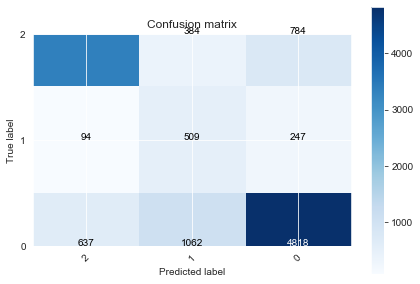

In [38]:
import itertools
cm = confusion_matrix(y_test, RFCpredictions)
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

### Ridge Classifier 

In [39]:
#tried a L2 penalty to see if it helps to define our model
from sklearn.linear_model import RidgeClassifier

In [40]:
#instantiating the classifier
rclf=RidgeClassifier(alpha=[100], class_weight='balanced', solver='cholesky')

In [41]:
#fitting model
rclf.fit(X_train, y_train)

RidgeClassifier(alpha=[100], class_weight='balanced', solver='cholesky')

In [42]:
#predicting with model
rclf_pred= rclf.predict(X_test)

In [43]:
#model evaluation metrics
print(metrics.f1_score(y_test, rclf_pred, average='weighted'))
print(metrics.accuracy_score(y_test, rclf_pred))
print(metrics.precision_score(y_test, rclf_pred, average='weighted'))
print(metrics.recall_score(y_test, rclf_pred, average='weighted'))
print(metrics.confusion_matrix(y_test, rclf_pred))

0.6531334022651871
0.6106060606060606
0.7329216814614781
0.6106060606060606
[[2807  759  947]
 [ 103  520  227]
 [ 656 1934 3927]]


### Bagging Classifier w Ridge Classifier

In [44]:
#The bagging classifier with ridge instantiation
bagging_rclf=BaggingClassifier(rclf,n_estimators=500, n_jobs=-1, bootstrap_features=True,
             max_samples=.25, max_features=.25,oob_score=True ,verbose=3)

In [45]:
bagging_rclf.fit(X_train,y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   17.8s finished


BaggingClassifier(base_estimator=RidgeClassifier(alpha=[100],
                                                 class_weight='balanced',
                                                 solver='cholesky'),
                  bootstrap_features=True, max_features=0.25, max_samples=0.25,
                  n_estimators=500, n_jobs=-1, oob_score=True, verbose=3)

In [46]:
brclf_pred= bagging_rclf.predict(X_test)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    4.2s finished


In [47]:
print(metrics.f1_score(y_test, brclf_pred, average='weighted'))
print(metrics.accuracy_score(y_test, brclf_pred))
print(metrics.precision_score(y_test, brclf_pred, average='weighted'))
print(metrics.recall_score(y_test, brclf_pred, average='weighted'))

0.6270349662036201
0.5877104377104377
0.6962369158319642
0.5877104377104377


### Extra  Trees Classifier

In [48]:
from sklearn.ensemble import ExtraTreesClassifier

In [49]:
#Instantiating extra trees classifier
Xtc=ExtraTreesClassifier(n_estimators=2000, warm_start=False, criterion= 'gini', bootstrap=True, min_samples_split= 2, max_features= None, min_samples_leaf= 2, n_jobs=-1, 
                         random_state = 20, class_weight='balanced')

In [50]:
#fitting Xtra trees classifier
Xtc.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=True, class_weight='balanced', max_features=None,
                     min_samples_leaf=2, n_estimators=2000, n_jobs=-1,
                     random_state=20)

In [51]:
#Predicting the target variable on test set
Xtc_pred=Xtc.predict(X_test)

In [52]:
#Extra Trees Classifier metrics
print(metrics.f1_score(y_test, Xtc_pred, average='weighted'))
print(metrics.accuracy_score(y_test, Xtc_pred))
print(metrics.precision_score(y_test, Xtc_pred, average='weighted'))
print(metrics.recall_score(y_test, Xtc_pred, average='weighted'))
print(metrics.confusion_matrix(y_test, Xtc_pred))

0.7451798048640328
0.7260942760942761
0.7778909224676968
0.7260942760942761
[[3387  381  745]
 [ 107  503  240]
 [ 721 1060 4736]]


Confusion Matrix, without normalization
[[3387  381  745]
 [ 107  503  240]
 [ 721 1060 4736]]


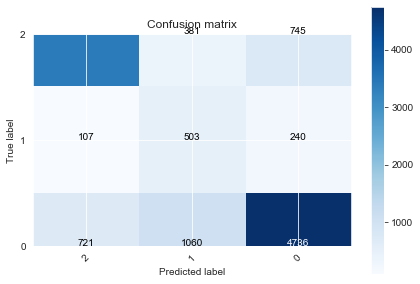

In [53]:
#plotting the confusion matrix
import itertools
cm = confusion_matrix(y_test, Xtc_pred)
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

### XGBoost Classifier w/ Gridsearch

In [70]:
#importing xgboost classifier
import xgboost as xgb

In [71]:
#instantiating xgboost 
xg_clf = xgb.XGBClassifier(colsample_bytree = 0.3, 
                           booster = 'gbtree',
                           subsample = 0.5,
                           learning_rate = 0.1,
                           max_depth = 4, 
                           verbosity=3,
                           alpha = 1, 
                           reg_lambda=1.00,
                           n_estimators = 10000)


In [72]:
#creating a param grid for Gridsearch
xgclf= xgb.XGBClassifier(random_state=1, average=['weighted'])
param_grid = {
    "learning_rate": [0.1],
    'max_depth': [8],
    'min_child_weight': [10],
    'subsample': [ 0.7],
    'reg_lambda':[.5,1.0],
    'n_estimators':[250,500],
    'average':['weighted']}

In [73]:
#gridsearch with XGBoost
grid_clf = GridSearchCV(xgclf, param_grid, cv=3, scoring='accuracy', 
                        n_jobs=-1)

In [ ]:
#cleaning up features
features1['Old']=results['Age']

In [133]:
#cleaning up some of our extra uneeded features
features2=features1[[ 'population', 'gravity', 'nira/tanira', 'submersible',
       'swn 80', 'machine dbh', 'rainwater harvesting', 'river',
       'shallow well', 'spring', 'communal standpipe', 'hand pump',
       'salty', 'soft','dry', 'enough', 'insufficient', 'seasonal',
       'annually', 'monthly', 'never pay', 'on failure', 'per bucket',
       'private operator', 'vwc', 'water board', 'wua', 'wug',
       'Arusha', 'Dodoma', 'Iringa', 'Kagera', 'Kigoma', 'Kilimanjaro', 'Mara',
       'Mbeya', 'Morogoro', 'Mtwara', 'Mwanza', 'Pwani', 'Rukwa', 'Ruvuma',
       'Shinyanga', 'Singida', 'Tanga', 'permit', 'Old']]

In [134]:
#TTS using our RFECV features which answers our feature importance question thru permutation importance
X_train1, X_test1, y_train1, y_test1 = train_test_split(features2, target, random_state=23,test_size=0.2)
print(X_train1.shape, y_train1.shape)
print(X_test1.shape, y_test1.shape)

(47520, 47) (47520,)
(11880, 47) (11880,)


In [132]:
features2

,population,gravity,nira/tanira,other,other,other,other,other,other,other,other,other,other,submersible,swn 80,machine dbh,rainwater harvesting,river,shallow well,spring,communal standpipe,hand pump,other,other,other,other,other,other,other,other,other,other,salty,soft,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,dry,enough,insufficient,seasonal,annually,monthly,never pay,on failure,per bucket,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,private operator,vwc,water board,wua,wug,Arusha,Dodoma,Iringa,Kagera,Kigoma,Kilimanjaro,Mara,Mbeya,Morogoro,Mtwara,Mwanza,Pwani,Rukwa,Ruvuma,Shinyanga,Singida,Tanga,permit,Old
0,109,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,21
1,280,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,10
2,250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,11
3,58,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,34
4,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,125,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,21
59396,56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,24
59397,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2,20
59398,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,20


In [135]:
#fitting the model
grid_clf.fit(X_train1,y_train1)

[15:39:54] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:480: 
Parameters: { average } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




KeyError: 'base_score'

KeyError: 'base_score'

In [140]:
#predicting the target
grid_clf_pred= grid_clf.predict(X_test1)

In [137]:
#Evaluation metrics
print(metrics.f1_score(y_test, grid_clf_pred, average='weighted'))
print(metrics.accuracy_score(y_test, grid_clf_pred))
print(metrics.precision_score(y_test, grid_clf_pred, average='weighted'))
print(metrics.recall_score(y_test, grid_clf_pred, average='weighted'))
print(metrics.mean_squared_error(y_test, grid_clf_pred))
print(metrics.confusion_matrix(y_test, grid_clf_pred))

0.7678202575371166
0.7792087542087542
0.768826534759132
0.7792087542087542
0.6664983164983165
[[3339   49 1125]
 [ 141  183  526]
 [ 640  142 5735]]


In [138]:
#finding out best params to use 
grid_clf.best_params_

{'average': 'weighted',
 'learning_rate': 0.1,
 'max_depth': 8,
 'min_child_weight': 10,
 'n_estimators': 500,
 'reg_lambda': 1.0,
 'subsample': 0.7}

Confusion Matrix, without normalization
[[3339   49 1125]
 [ 141  183  526]
 [ 640  142 5735]]


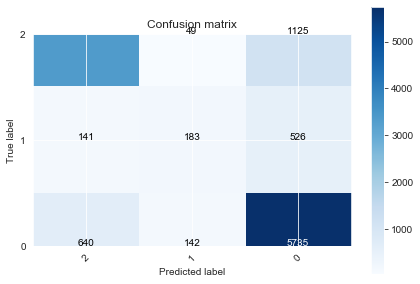

In [139]:
#plotting confusion matrix
import itertools
cm = confusion_matrix(y_test, grid_clf_pred)
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

### Decision Tree Classifier

In [54]:
#importing decision tree classifier, setting parameters, and fitting model
from sklearn.tree import DecisionTreeClassifier
tree_reg1 = DecisionTreeClassifier(criterion='entropy', random_state=42, min_samples_leaf=1, max_features=1)
tree_reg1.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_features=1, random_state=42)

In [55]:
#predicted values for our target variable
y_pred1= tree_reg1.predict(X_test)

In [56]:
#Model's evaluation metrics
print(metrics.f1_score(y_test, y_pred1, average='weighted'))
print(metrics.accuracy_score(y_test, y_pred1))
print(metrics.precision_score(y_test, y_pred1, average='weighted'))
print(metrics.recall_score(y_test, y_pred1, average='weighted'))
print(metrics.confusion_matrix(y_test, y_pred1))

0.743209006752158
0.7463804713804714
0.7407615271816869
0.7463804713804714
[[3353  127 1033]
 [ 163  249  438]
 [ 931  321 5265]]


### K-Nearest Neighbors Classifier

In [57]:
#importing classifier
from sklearn.neighbors import KNeighborsClassifier

In [58]:
#instantiating the model with certain paramters
knn = KNeighborsClassifier(n_neighbors=8, algorithm ='brute', n_jobs=-1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute', n_jobs=-1, n_neighbors=8)

In [59]:
knn_preds = knn.predict(X_test)

In [60]:
knn_f1 = metrics.f1_score(y_test, knn_preds, average='weighted')
print(knn_f1)
print(metrics.accuracy_score(y_test, knn_preds))
print(metrics.precision_score(y_test, knn_preds, average='weighted'))
print(metrics.recall_score(y_test, knn_preds, average='weighted'))

0.6941054679562828
0.7066498316498316
0.6897796910406425
0.7066498316498316


### Voting Classifier estimators used: knn, dtc, rfc

In [61]:
#instantiating voting classifier, ensemble method for 3 models
voting_clf = VotingClassifier(
                estimators=[('knearest', knn), ('randomforest', rfc)
    , ('decisiontree', tree_reg1)], n_jobs=-1, verbose=2)

In [62]:
#fitting model
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('knearest',
                              KNeighborsClassifier(algorithm='brute', n_jobs=-1,
                                                   n_neighbors=8)),
                             ('randomforest',
                              RandomForestClassifier(class_weight='balanced',
                                                     min_samples_leaf=2,
                                                     n_estimators=1000,
                                                     n_jobs=-1,
                                                     random_state=20)),
                             ('decisiontree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_features=1,
                                                     random_state=42))],
                 n_jobs=-1, verbose=2)

In [63]:
#predicting model
vc_preds = voting_clf.predict(X_test)

In [64]:
#model metrics
print(metrics.f1_score(y_test, vc_preds, average='weighted'))
print(metrics.accuracy_score(y_test, vc_preds))
print(metrics.precision_score(y_test, vc_preds, average='weighted'))
print(metrics.recall_score(y_test, vc_preds, average='weighted'))

0.7626116231511177
0.767087542087542
0.7595848303403266
0.767087542087542


### Bagging Classifier w/ random forest

In [ ]:
#bagging classifier of multiple random forests
from sklearn.ensemble import BaggingClassifier
bagging = BaggingClassifier(rfc,n_estimators=20, n_jobs=-1, warm_start=True,
                           max_samples=.5, max_features=.5, verbose=3)

In [ ]:
#training model
bagging.fit(X_train, y_train)

In [ ]:
#predicting model
bag_pred=bagging.predict(X_test)

In [ ]:
#metrics
print(metrics.f1_score(y_test, bag_pred, average='weighted'))
print(metrics.accuracy_score(y_test, bag_pred))
print(metrics.precision_score(y_test, bag_pred, average='weighted'))
print(metrics.recall_score(y_test, bag_pred, average='weighted'))
print(metrics.confusion_matrix(y_test, bag_pred))

### Gradient Boosting Classifier

In [65]:
#Instantiating model
gclf= GradientBoostingClassifier(n_estimators= 200, learning_rate= .2, verbose=1)

In [66]:
gclf.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1       39357.5812            1.01m
         2       37579.6401            1.05m
         3       36372.3330            1.03m
         4       35436.4205            1.02m
         5       34731.4591            1.03m
         6       34199.4530            1.02m
         7       33694.7990            1.01m
         8       33304.3623           59.97s
         9       32980.5972           59.52s
        10       32649.9050           59.51s
        20       30998.1151           55.05s
        30       30155.7373           58.53s
        40       29625.7415           56.92s
        50       29209.2167           51.20s
        60       28884.4236           46.79s
        70       28594.8818           45.36s
        80       28350.2335           40.92s
        90       28137.9164           36.91s
       100       27967.2523           33.32s
       200       26565.5311            0.00s


GradientBoostingClassifier(learning_rate=0.2, n_estimators=200, verbose=1)

In [67]:
gclf_pred= gclf.predict(X_test)

In [68]:
print(metrics.f1_score(y_test, gclf_pred, average='weighted'))
print(metrics.accuracy_score(y_test, gclf_pred))
print(metrics.precision_score(y_test, gclf_pred, average='weighted'))
print(metrics.recall_score(y_test, gclf_pred, average='weighted'))
print(metrics.mean_squared_error(y_test, gclf_pred))
print(metrics.confusion_matrix(y_test, gclf_pred))

0.7470049500951893
0.767003367003367
0.7622947287428125
0.767003367003367
0.7234006734006734
[[3062   23 1428]
 [ 138  103  609]
 [ 514   56 5947]]


Confusion Matrix, without normalization
[[3062   23 1428]
 [ 138  103  609]
 [ 514   56 5947]]


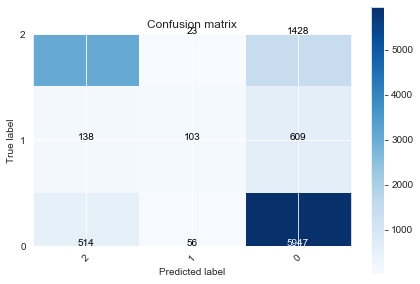

In [69]:
import itertools
cm = confusion_matrix(y_test, gclf_pred)
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

### Recursive Feature Elimination Model

In [79]:
#I selected these params because, rfc gave me the best results. I cross-validated to give the 
#model different slices to our evaluation. I chose to select 3 features minimally at a time so
#the evaluation can have some interaction with the other features.

selector = RFECV(estimator=rfc, step=1, cv=3, n_jobs=-1, min_features_to_select=3, verbose=3)

In [80]:
#training the model
selector.fit(X_train, y_train)

Fitting estimator with 91 features.
Fitting estimator with 90 features.
Fitting estimator with 89 features.
Fitting estimator with 88 features.
Fitting estimator with 87 features.
Fitting estimator with 86 features.
Fitting estimator with 85 features.
Fitting estimator with 84 features.
Fitting estimator with 83 features.
Fitting estimator with 82 features.
Fitting estimator with 81 features.
Fitting estimator with 80 features.
Fitting estimator with 79 features.
Fitting estimator with 78 features.
Fitting estimator with 77 features.
Fitting estimator with 76 features.
Fitting estimator with 75 features.
Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 fe

RFECV(cv=3,
      estimator=RandomForestClassifier(class_weight='balanced',
                                       min_samples_leaf=2, n_estimators=1000,
                                       n_jobs=-1, random_state=20),
      min_features_to_select=3, n_jobs=-1, verbose=3)

In [81]:
#knowing which features were selected and dropped
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [82]:
#These features that were selected will be used to test our model
print(selected_rfe)

Index(['Age', 'population', 'gravity', 'nira/tanira', 'other', 'submersible',
       'swn 80', 'machine dbh', 'rainwater harvesting', 'river',
       'shallow well', 'spring', 'communal standpipe', 'hand pump', 'other',
       'salty', 'soft', 'unknown', 'dry', 'enough', 'insufficient', 'seasonal',
       'annually', 'monthly', 'never pay', 'on failure', 'per bucket',
       'unknown', 'private operator', 'vwc', 'water board', 'wua', 'wug',
       'Arusha', 'Dodoma', 'Iringa', 'Kagera', 'Kigoma', 'Kilimanjaro', 'Mara',
       'Mbeya', 'Morogoro', 'Mtwara', 'Mwanza', 'Pwani', 'Rukwa', 'Ruvuma',
       'Shinyanga', 'Singida', 'Tanga', 'permit', 'Age'],
      dtype='object')


In [83]:
#predicting our target variable
y_pred= selector.predict(X_test)

In [84]:
len(list(selected_rfe))

52

Confusion Matrix, without normalization
[[3353  377  783]
 [  94  497  259]
 [ 656 1038 4823]]


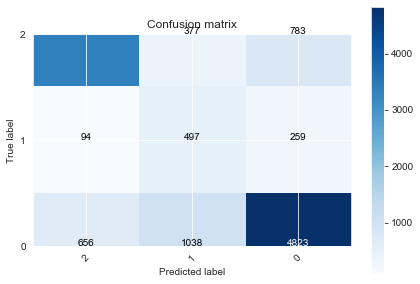

In [85]:
import itertools
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [86]:
print("Testing Metric:",metrics.f1_score(y_test, y_pred, average='weighted'))
print(metrics.accuracy_score(y_test, y_pred))
print(metrics.precision_score(y_test, y_pred, average='weighted'))
print(metrics.recall_score(y_test, y_pred, average='weighted'))
print(metrics.mean_squared_error(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))


Testing Metric: 0.7487729048368547
0.7300505050505051
0.7801485262201726
0.7300505050505051
0.6333333333333333
[[3353  377  783]
 [  94  497  259]
 [ 656 1038 4823]]


### AdaBoost w/ random forest

In [147]:
#Instantiating a model
clf = AdaBoostClassifier(rfc, n_estimators=20, learning_rate=1, random_state=23) 

In [148]:
clf.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(class_weight='balanced',
                                                         min_samples_leaf=2,
                                                         n_estimators=1000,
                                                         n_jobs=-1,
                                                         random_state=20),
                   learning_rate=1, n_estimators=20, random_state=23)

In [145]:
clf_pred= clf.predict(X_test)

In [146]:
print(metrics.f1_score(y_test, clf_pred, average='weighted'))
print(metrics.accuracy_score(y_test, clf_pred))
print(metrics.precision_score(y_test, clf_pred, average='weighted'))
print(metrics.recall_score(y_test, clf_pred, average='weighted'))
print(metrics.mean_squared_error(y_test, clf_pred))
print(metrics.confusion_matrix(y_test, clf_pred))

0.7530834246179579
0.7588383838383839
0.7502864330578137
0.7588383838383839
0.7151515151515152
[[3345   91 1077]
 [ 148  227  475]
 [ 800  274 5443]]


Confusion Matrix, without normalization
[[3345   91 1077]
 [ 148  227  475]
 [ 800  274 5443]]


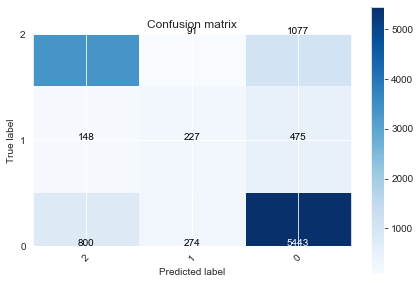

In [149]:
import itertools
cm = confusion_matrix(y_test, clf_pred)
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)